In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import sys
from pathlib import Path
sys.path.append("../iclr_17_compression/")
import torch
from test_model import plot_tensor
import random as rd
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt

In [53]:
path_to_covers = Path("../JIN_SRNet/BossBase-1.01-cover/")
path_to_stego = Path("../JIN_SRNet/stego_1e_4/")

cover_files = list(path_to_covers.glob("*.pt"))
stego_files = list(path_to_stego.glob("*.pt")) #we use glob because there is a txt file in stego folder

torch.Size([1, 3, 512, 512])


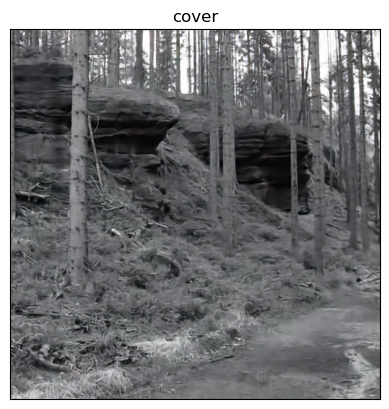

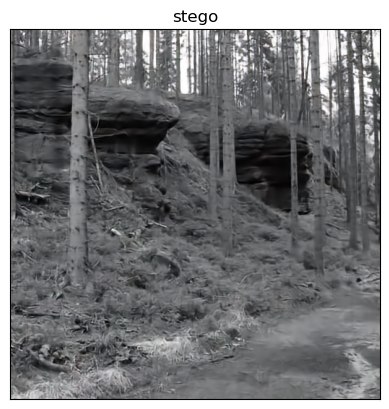

In [54]:
id_random = rd.randint(0,len(cover_files))
cover_file = list(path_to_covers.glob(f"*{id_random}*.pt"))[0]
stego_file = list(path_to_stego.glob(f"*{id_random}*.pt"))[0]

cover_t = torch.load(cover_file)
stego_t = torch.load(stego_file) 
print(cover_t.shape)
# print(cover_t)
plot_tensor(cover_t,"cover")
plot_tensor(stego_t,"stego")

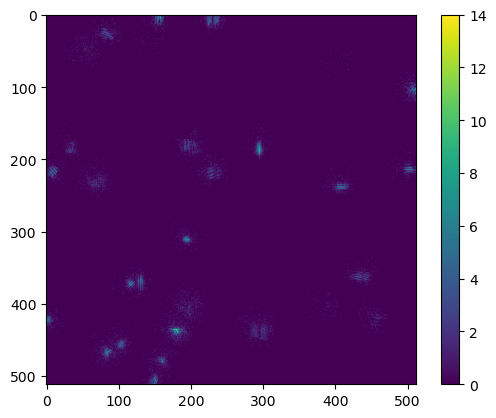

In [55]:
to_pil = transforms.ToPILImage()

cover_np = np.array(to_pil(cover_t[0])).astype(int)
stego_np = np.array(to_pil(stego_t[0])).astype(int)

diff = np.abs(cover_np - stego_np)
plt.imshow(diff[:,:,0])
plt.colorbar()

In [56]:
# np.save("../jan/cover.npy",cover_np)
# np.save("../jan/stego_0_1.npy",stego_np)

In [57]:
def load_tensor_as_np(file: str):
    return np.array(to_pil(torch.load(file)[0])).astype(int)

In [58]:
# cover = np.load("../cover_stego/cover.npy")
# stego = load_tensor_as_np("../cover_stego/1008.pt") # generated with image nb 10

In [59]:
# plt.imshow(np.abs(cover-stego_01)[:,:,0])
# plt.colorbar()
# plt.show()

In [60]:
# plt.imshow(np.abs(cover-stego)[:,:,0])
# plt.colorbar()

In [61]:
# np.save("../cover_stego/stego_p_0_01.npy",stego)

In [62]:
# plt.imshow(np.load("../cover_stego/stego_p_0_01.npy"))

In [63]:
cover_np = load_tensor_as_np("../JIN_SRNet/BossBase-1.01-cover/1008.pt")
stego_0_1 = load_tensor_as_np("./stego/1008/0_1.pt")
stego_0_01 = load_tensor_as_np("./stego/1008/0_01.pt")
stego_0_001 = load_tensor_as_np("./stego/1008/0_001.pt")

Text(0.5, 1.0, 'cover')

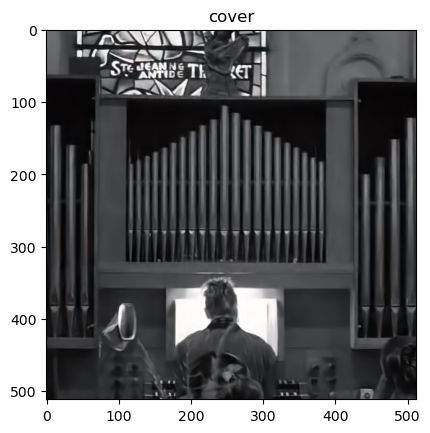

In [64]:
plt.imshow(cover_np)
plt.title("cover")

Text(0.5, 1.0, 'stego p=0.1')

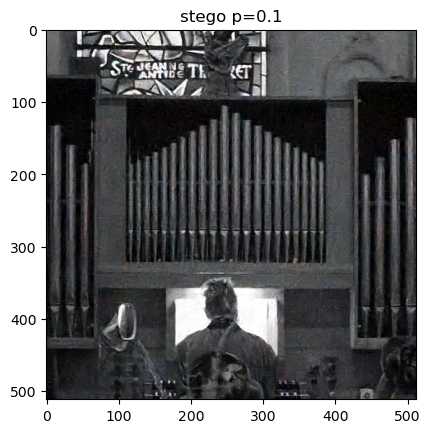

In [65]:
plt.imshow(stego_0_1)
plt.title("stego p=0.1")

Text(0.5, 1.0, 'p = 0.01')

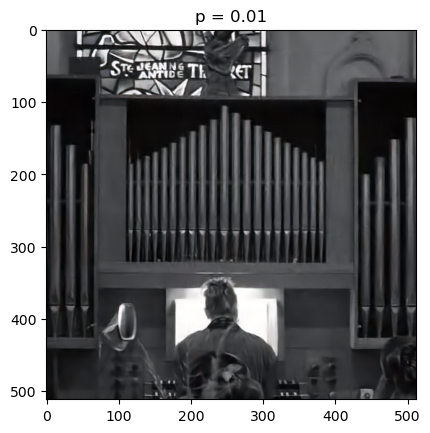

In [66]:
plt.imshow(stego_0_01)
plt.title("p = 0.01")

Text(0.5, 1.0, '|cover-stego| ; p = 0.1')

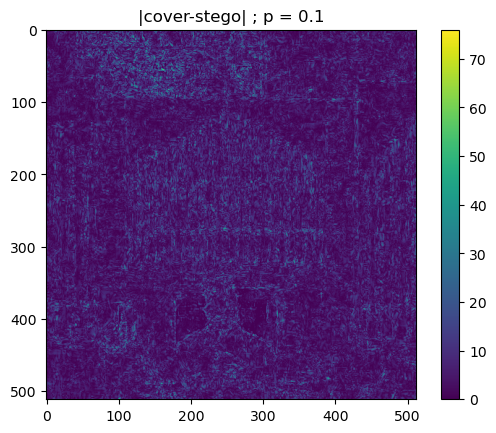

In [73]:
plt.imshow(np.abs(cover_np-stego_0_1)[:,:,0])
plt.colorbar()
plt.title("|cover-stego| ; p = 0.1")

Text(0.5, 1.0, '|cover - stego| ; p = 0.01')

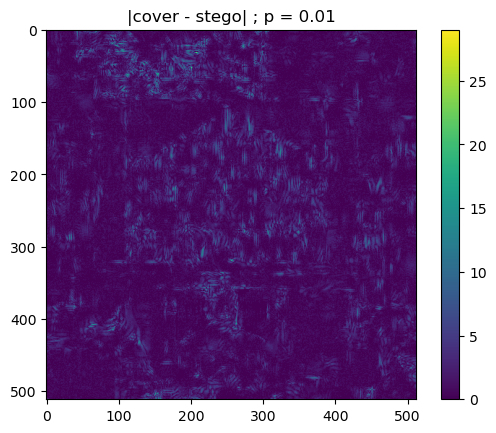

In [74]:
plt.imshow(np.abs(cover_np-stego_0_01)[:,:,0])
plt.colorbar()
plt.title("|cover - stego| ; p = 0.01")

Text(0.5, 1.0, '|cover-stego| ; p=0.001')

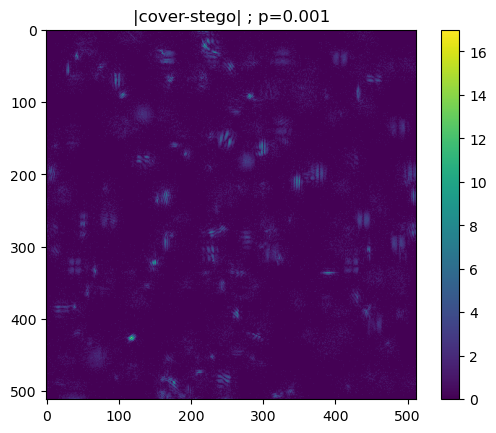

In [75]:
plt.imshow(np.abs(cover_np-stego_0_001)[:,:,0])
plt.colorbar()
plt.title("|cover-stego| ; p=0.001")